The aim of this exericse is to build a CNN from scratch using pytorch framework and understand the effect of various kinds of regularizations and optimizers on training and test performance.

In [ ]:
import torch
import time
import torchvision
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt
from torchvision import transforms
from sklearn.model_selection import train_test_split

In [ ]:
! pip install torchsummary
from torchsummary import summary

Fashion MNIST is a popular benchmark dataset in the field of computer vision and machine learning, serving as a substitute for the traditional handwritten digit MNIST dataset. It comprises a collection of grayscale images representing various clothing articles, accessories, and footwear. Each image is 28x28 pixels in size and is labeled with one of 10 categories, including items such as t-shirts, trousers, pullovers, dresses, coats, sandals, shirts, sneakers, bags, and ankle boots.

In [ ]:
trainset = torchvision.datasets.FashionMNIST(root='./data', train=True,
                                        download=True)
testset = torchvision.datasets.FashionMNIST(root='./data', train=False,
                                       download=True)

In [ ]:
import numpy as np
np.array(trainset[0][0])

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 155, 236, 207, 178, 107, 156, 161, 109,  64,  23,  77, 130,
         72,  15],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
         69, 207, 223, 218, 216, 216, 163, 127, 121, 122, 146, 141,  88,
        172,  66],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   1,   0,
        200, 232, 232, 233, 229, 223, 223, 215, 213, 164, 127, 123, 196,
        229,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        183, 225, 216, 223, 228, 235, 227, 224, 222, 224, 221, 223, 245,
        173,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        193, 228, 218, 213, 198, 180, 212, 210, 211, 213, 223, 220, 243,
        202,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   3,   0,  12,
        219, 220, 212, 218, 192, 169, 227, 208, 218, 224, 212, 226, 197,
        209,  52],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,  99,
        244, 222, 220, 218, 203, 198, 221, 215, 213, 222, 220, 245, 119,
        167,  56],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,   0,  55,
        236, 228, 230, 228, 240, 232, 213, 218, 223, 234, 217, 217, 209,
         92,   0],
       [  0,   0,   1,   4,   6,   7,   2,   0,   0,   0,   0,   0, 237,
        226, 217, 223, 222, 219, 222, 221, 216, 223, 229, 215, 218, 255,
         77,   0],
       [  0,   3,   0,   0,   0,   0,   0,   0,   0,  62, 145, 204, 228,
        207, 213, 221, 218, 208, 211, 218, 224, 223, 219, 215, 224, 244,
        159,   0],
       [  0,   0,   0,   0,  18,  44,  82, 107, 189, 228, 220, 222, 217,
        226, 200, 205, 211, 230, 224, 234, 176, 188, 250, 248, 233, 238,
        215,   0],
       [  0,  57, 187, 208, 224, 221, 224, 208, 204, 214, 208, 209, 200,
        159, 245, 193, 206, 223, 255, 255, 221, 234, 221, 211, 220, 232,
        246,   0],
       [  3, 202, 228, 224, 221, 211, 211, 214, 205, 205, 205, 220, 240,
         80, 150, 255, 229, 221, 188, 154, 191, 210, 204, 209, 222, 228,
        225,   0],
       [ 98, 233, 198, 210, 222, 229, 229, 234, 249, 220, 194, 215, 217,
        241,  65,  73, 106, 117, 168, 219, 221, 215, 217, 223, 223, 224,
        229,  29],
       [ 75, 204, 212, 204, 193, 205, 211, 225, 216, 185, 197, 206, 198,
        213, 240, 195, 227, 245, 239, 223, 218, 212, 209, 222, 220, 221,
        230,  67],
       [ 48, 203, 183, 194, 213, 197, 185, 190, 194, 192, 202, 214, 219,
        221, 220, 236, 225, 216, 199, 206, 186, 181, 177, 172, 181, 205,
        206, 115],
       [  0, 122, 219, 193, 179, 171, 183, 196, 204, 210, 213, 207, 211,
        210, 200, 196, 194, 191, 195, 191, 198, 192, 176, 156, 167, 177,
        210,  92],
       [  0,   0,  74, 189, 212, 191, 175, 172, 175, 181, 185, 188, 189,
        188, 193, 198, 204, 209, 210, 210, 211, 188, 188, 194, 192, 216,
        170,   0],
       [  2,   0,   0,   0,  66, 200, 22

In [ ]:
np.array(trainset[0][0]).size

784

In [ ]:
classes = {0:'T-shirt/top',1:'Trouser',2:'Pullover',3:'Dress',4:'Coat',5:'Sandal',6:'Shirt',7:'Sneaker',8:'Bag',9:'Ankle boot'}

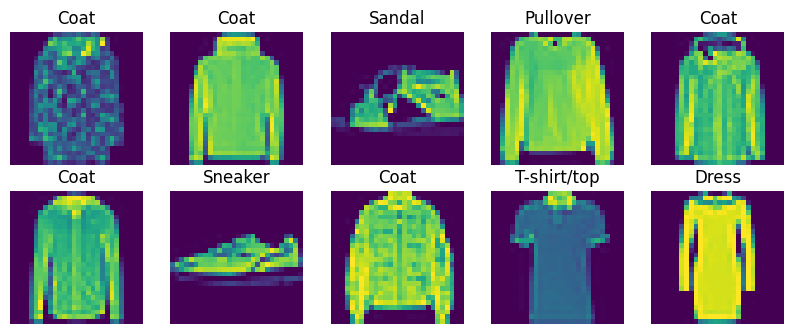

In [ ]:
import random
plt.figure(figsize=(10, 10))
for x in range(10):
 i = random.randint(0,2000)
 img,label = testset[i]
 ax = plt.subplot(5, 5, x + 1)
 plt.imshow(img)
 plt.title(classes[label])
 plt.axis("off")
plt.show()

In [ ]:
len(trainset),len(testset)

(60000, 10000)

In [ ]:
class nn_model(nn.Module):
  def __init__(self, input_size, init_value=None, dropout = False, batch_norm= False):
    super(nn_model,self).__init__()
    self.input_size = input_size
    self.dropout = dropout
    self.batch_norm=batch_norm

    self.layer1 = nn.Linear(self.input_size, 256)
    self.activation1 = nn.Tanh()
    self.bnorm1 = nn.BatchNorm1d(256)
    self.layer2 = nn.Linear(256, 128)
    self.activation2 = nn.Tanh()
    self.bnorm2 = nn.BatchNorm1d(128)
    self.drop= nn.Dropout(p=0.2)
    self.layer3 = nn.Linear(128, 64)
    self.bnorm3 = nn.BatchNorm1d(64)
    self.activation3 = nn.Tanh()
    self.output = nn.Linear(64,10)
    self.output_activation = nn.Softmax()


    if init_value is not None:
      nn.init.uniform_(self.layer1.weight, a=init_value[0], b=init_value[1])
      nn.init.uniform_(self.layer1.bias, a=init_value[0], b=init_value[1])
      nn.init.uniform_(self.layer2.weight, a=init_value[0], b=init_value[1])
      nn.init.uniform_(self.layer2.bias, a=init_value[0], b=init_value[1])
      nn.init.uniform_(self.layer3.weight, a=init_value[0], b=init_value[1])
      nn.init.uniform_(self.layer3.bias, a=init_value[0], b=init_value[1])

  def forward(self,x):
    layer1 = self.layer1(x)
    if self.batch_norm:
      layer1 = self.bnorm1(layer1)
    activation1 = self.activation1(layer1)

    layer2 = self.layer2(activation1)
    if self.batch_norm:
      layer2 = self.bnorm2(layer2)
    activation2 = self.activation2(layer2)

    if self.dropout:
      activation2 = self.drop(activation2)

    layer3 = self.layer3(activation2)
    if self.batch_norm:
      layer3 = self.bnorm3(layer3)
    activation3 = self.activation3(layer3)

    output_z = self.output(activation3)
    output = self.output_activation(output_z)
    return output

In [ ]:
class prep_data():
  def __init__(self, trainset, testset, make_valid = False):
    self.make_valid = make_valid
    self.trainset = trainset
    self.testset = testset

  def data_split(self):
    if self.make_valid:
      self.train, self.valid = train_test_split(self.trainset, test_size=0.15,random_state=42)
      self.test = []
      for i in self.testset:
        self.test.append(i)
      return (self.train, self.valid,self.test)
    else:
      self.train = []
      for i in self.trainset:
        self.train.append(i)
      self.test = []
      for i in self.testset:
        self.test.append(i)
      return (self.train, self.test)

  @staticmethod
  def transform_data(dataset):
    y =[]
    x =[]
    for data in dataset:
      convert_pil_tensor = transforms.ToTensor()
      x.append(torch.flatten(convert_pil_tensor(data[0])))
      y.append(data[1])

    x = torch.stack(x,dim=0)
    y = torch.nn.functional.one_hot(torch.tensor(y), num_classes=10)
    return x,y

  @staticmethod
  def dataloader(data, batchsize=64):
    dataloader_list = []
    for i in range(0, len(data), batchsize):
      x,y = prep_data.transform_data(data[i:i + batchsize])
      dataloader_list.append((x,y))
    return dataloader_list

In [ ]:
class classifier():
  def __init__(self, model,train_loader, valid_loader, loss_func, opt, epochs,reg = False):
    self.model = model
    self.train_loader = train_loader
    self.valid_loader = valid_loader
    self.loss_func = loss_func
    self.optimiser = opt
    self.n_epochs = epochs
    self.l1_reg = reg


  def compute_l1_loss(self):
    l1_strength = 0.0001
    l1_loss = 0
    for param in self.model.parameters():
      l1_loss = l1_loss + torch.sum(torch.abs(param))
    return l1_strength*l1_loss

  def training(self):
    train_loss =[]
    train_accuracy =[]
    valid_loss = []
    valid_accuracy = []

    for epoch in range(self.n_epochs):
      train_acc = 0
      train_samples = 0
      train_epoch_loss = 0

      for x,y in self.train_loader:
        self.optimiser.zero_grad()

        y = y.to(torch.float)
        y_pred = self.model(x)
        loss = self.loss_func(y_pred, y)

        # Compute L1 loss component
        if self.l1_reg:
          loss += self.compute_l1_loss()

        loss.backward()
        self.optimiser.step()

        train_epoch_loss = train_epoch_loss + loss.item()
        train_acc = train_acc+classifier.accuracy(y, y_pred)
        train_samples = train_samples+len(x)

      train_loss.append(train_epoch_loss/len(self.train_loader))
      train_accuracy.append((train_acc/train_samples)*100.0)
      print(f'Finished training epoch {epoch},  training loss {train_loss[-1]},  training accuracy {train_accuracy[-1]}')

      if self.valid_loader:
        valid_epoch_loss,valid_acc =  self.evaluate(self.valid_loader)
        valid_loss.append(valid_epoch_loss)
        valid_accuracy.append(valid_acc)
        print(f'Finished validating epoch {epoch},  validation loss {valid_loss[-1]} , validation accuracy {valid_accuracy[-1]}')

    return (train_accuracy,valid_accuracy,train_loss,valid_loss)

  def evaluate(self,dataloader):
    epoch_loss = 0
    accuracy = 0
    n_samples = 0

    with torch.no_grad():
      self.model.eval()
      for x,y in iter(dataloader):
        y = y.to(torch.float)
        y_pred = self.model(x)

        loss = self.loss_func(y_pred, y)
        # Compute L1 loss component
        if self.l1_reg:
          #l1 = classifier.compute_l1_loss(torch.cat(l1_parameters))
          loss += self.compute_l1_loss()

        epoch_loss = epoch_loss + loss.item()
        accuracy = accuracy+classifier.accuracy(y, y_pred)
        n_samples = n_samples+len(x)

    return (epoch_loss/len(dataloader), (accuracy/n_samples)*100.0)

  def predict(self,dataloader):
    predictions = []
    with torch.no_grad():
      self.model.eval()
      for x,y in iter(dataloader):
        y_pred = self.model(x)
        y_pred_labels = torch.max(y_pred, 1)[1].tolist()
        predictions.extend(y_pred_labels)
    return predictions

  @staticmethod
  def accuracy(true, pred):
    pred = torch.max(pred, 1)[1]
    truth  = torch.max(true, 1)[1]
    acc = (pred == truth).sum()
    return acc

In [ ]:
def expt_design(input_size,train_loader,valid_loader,loss_func, epochs, opt, batch_norm = False, dropout = False,reg=False):
  model = nn_model(input_size, batch_norm= batch_norm, dropout = dropout)
  if opt == 'Adam':
    opt = torch.optim.Adam(model.parameters(),lr = 1e-4)
  else:
    opt = torch.optim.RMSprop(model.parameters(),lr = 1e-4, alpha=0.99, eps=1e-08)
  summary(model,(input_size,))
  trainer = classifier(model,train_loader, valid_loader, loss_func, opt, epochs,reg)
  train_accuracy,valid_accuracy,train_loss,valid_loss = trainer.training()
  return (train_accuracy,valid_accuracy,train_loss,valid_loss)

In [ ]:
dataprep = prep_data(trainset, testset, make_valid = True)
train,valid,_ = dataprep.data_split()
train_loader =  dataprep.dataloader(train)
valid_loader =  dataprep.dataloader(valid)


In [ ]:
input_size = 28*28
epochs = 30
loss_func = nn.CrossEntropyLoss()
expts = []

for optimizer in ['Adam','Rmsprop']:
  for reg_technique in ['','Batch Normalization','Drop out','L1 norm']:
    print((optimizer,reg_technique))
    time_start = time.time()
    if reg_technique == 'Batch Normalization':
      train_accuracy,valid_accuracy,train_loss,valid_loss = expt_design(input_size,train_loader,valid_loader,loss_func, epochs,optimizer, batch_norm =True)
    elif reg_technique == 'Drop out':
      train_accuracy,valid_accuracy,train_loss,valid_loss = expt_design(input_size,train_loader,valid_loader,loss_func,epochs,optimizer, dropout =True)
    elif reg_technique == 'L1 norm':
      train_accuracy,valid_accuracy,train_loss,valid_loss = expt_design(input_size,train_loader,valid_loader,loss_func,epochs,optimizer, reg =True)
    else:
      train_accuracy,valid_accuracy,train_loss,valid_loss = expt_design(input_size,train_loader,valid_loader,loss_func,epochs,optimizer)

    time_taken = time.time() - time_start
    expts.append([optimizer,reg_technique,time_taken,train_accuracy,valid_accuracy,train_loss,valid_loss])

('Adam', '')
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 256]         200,960
              Tanh-2                  [-1, 256]               0
            Linear-3                  [-1, 128]          32,896
              Tanh-4                  [-1, 128]               0
            Linear-5                   [-1, 64]           8,256
              Tanh-6                   [-1, 64]               0
            Linear-7                   [-1, 10]             650
           Softmax-8                   [-1, 10]               0
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.93
Estimated Total Size (MB): 0.94
----------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Finished training epoch 0,  training loss 1.90549521598792,  training accuracy 62.61568832397461
Finished validating epoch 0,  validation loss 1.7378565707105271 , validation accuracy 76.87777709960938
Finished training epoch 1,  training loss 1.6910060072782795,  training accuracy 79.25881958007812
Finished validating epoch 1,  validation loss 1.6795075988093167 , validation accuracy 79.44444274902344
Finished training epoch 2,  training loss 1.6635869702550967,  training accuracy 80.68235778808594
Finished validating epoch 2,  validation loss 1.6664273747315643 , validation accuracy 80.18888854980469
Finished training epoch 3,  training loss 1.6535971896112938,  training accuracy 81.25489807128906
Finished validating epoch 3,  validation loss 1.6606092833458108 , validation accuracy 80.55555725097656
Finished training epoch 4,  training loss 1.6478492476261095,  training accuracy 81.75294494628906
Finished validating epoch 4,  validation loss 1.6563679994420801 , validation accuracy 

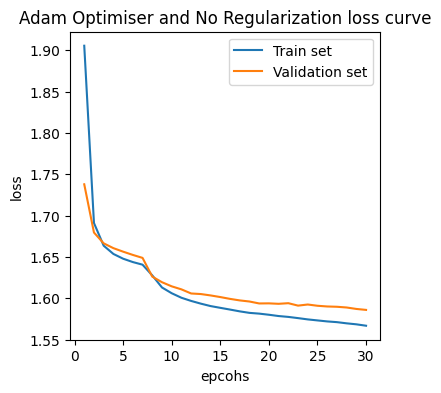

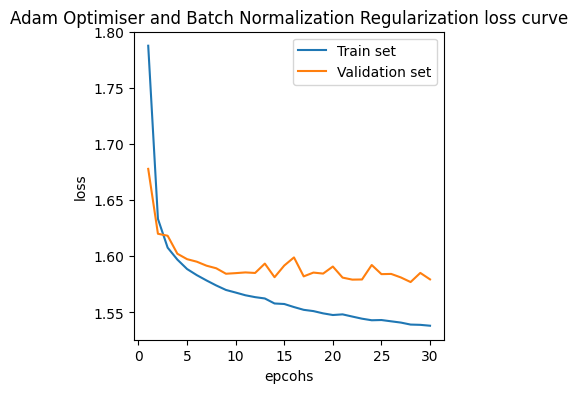

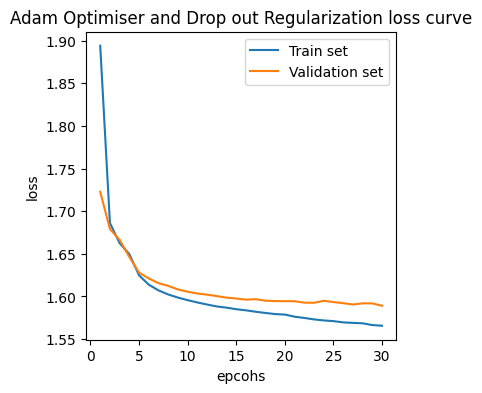

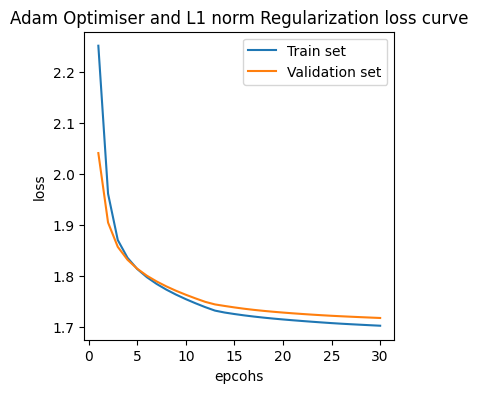

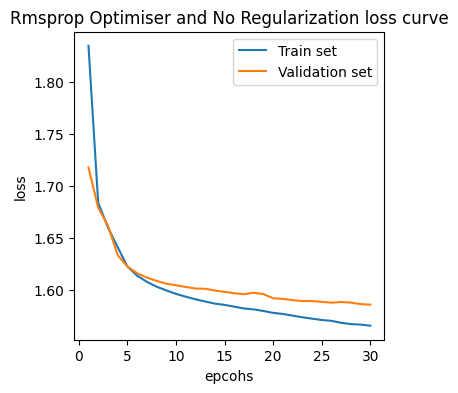

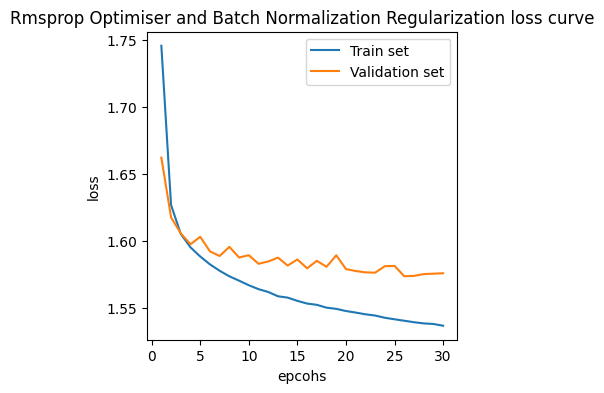

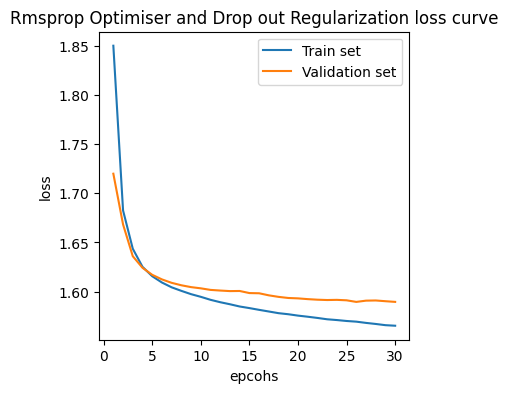

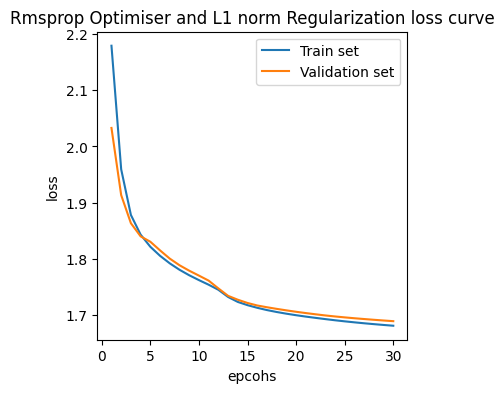

In [ ]:
for expt in expts:
  x = np.arange(1,31)  # X-axis points
  plt.figure(figsize=(4,4))
  plt.plot(x, expt[5], label='Train set')
  plt.plot(x, expt[6], label='Validation set')
  plt.xlabel("epcohs")
  plt.ylabel("loss")
  if expt[1] == '':
    val = 'No'
  else:
    val = expt[1]
  title = expt[0] +' Optimiser'+' and '+ val + ' Regularization loss curve'
  plt.title(title)
  plt.legend()
  plt.show()

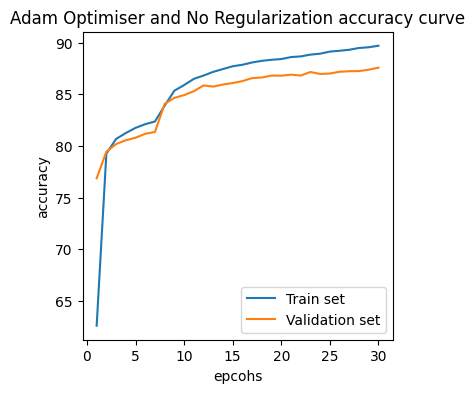

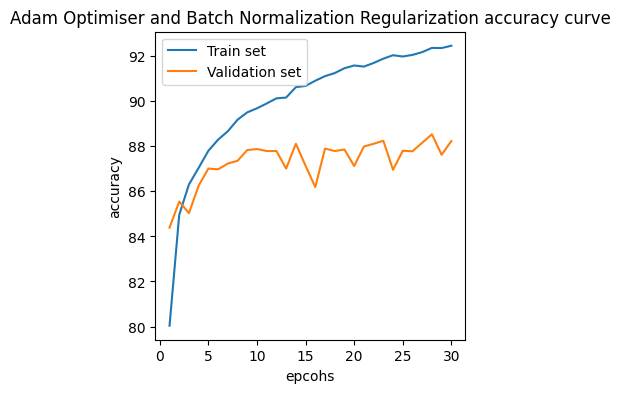

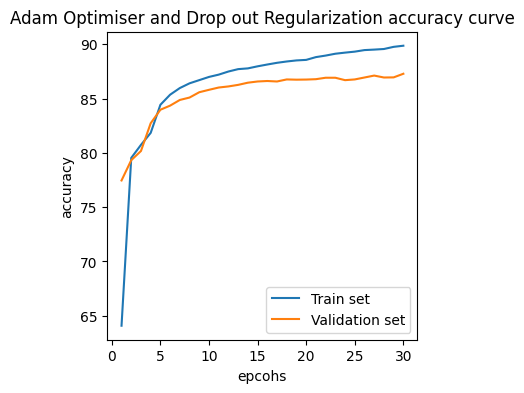

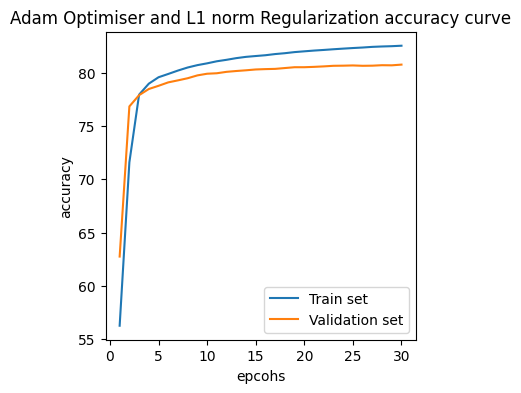

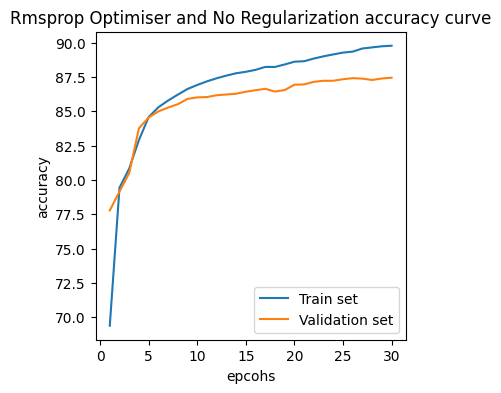

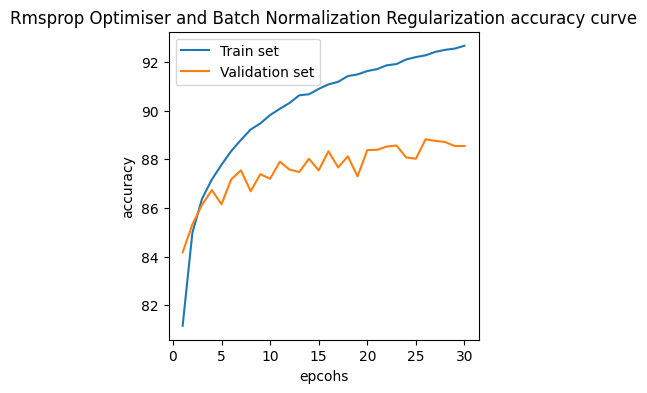

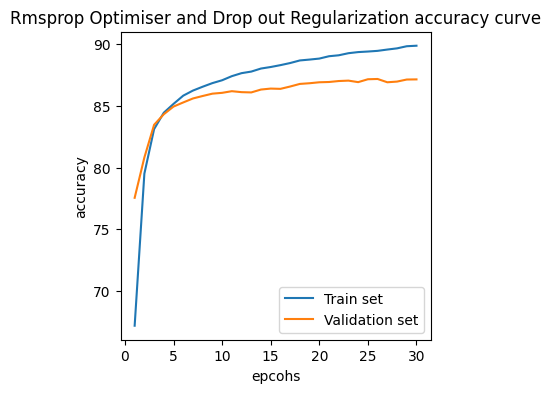

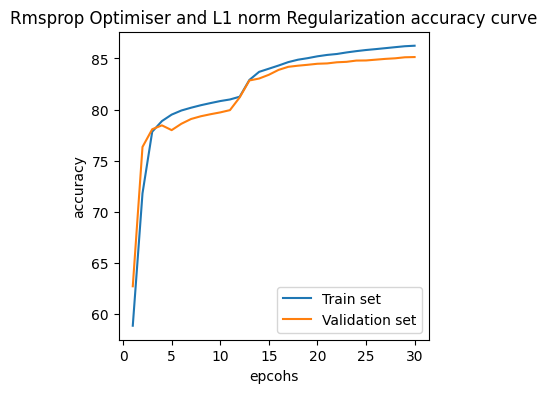

In [ ]:
for expt in expts:
  x = np.arange(1,31)  # X-axis points
  plt.figure(figsize=(4,4))
  plt.plot(x, expt[3],label='Train set')
  plt.plot(x, expt[4], label='Validation set')
  plt.xlabel("epcohs")
  plt.ylabel("accuracy")
  if expt[1] == '':
    val = 'No'
  else:
    val = expt[1]
  title = expt[0] +' Optimiser'+' and '+ val + ' Regularization accuracy curve'

  plt.title(title)
  plt.legend()
  plt.show()


In [ ]:
df = pd.DataFrame(expts,columns=['optimizer','reg_technique','time_taken','train_accuracy','valid_accuracy','train_loss','valid_loss'])

In [ ]:
df['train_accuracy'] = df['train_accuracy'].apply(lambda x : x[-1])
df['valid_accuracy'] = df['valid_accuracy'].apply(lambda x : x[-1])

df['train_loss'] = df['train_loss'].apply(lambda x : x[-1])
df['valid_loss'] = df['valid_loss'].apply(lambda x : x[-1])

In [ ]:
df

,optimizer,reg_technique,time_taken,train_accuracy,valid_accuracy,train_loss,valid_loss
0,Adam,,67.891638,tensor(89.6980),tensor(87.5778),1.566771,1.585909
1,Adam,Batch Normalization,75.665050,tensor(92.4627),tensor(88.2333),1.538166,1.579440
2,Adam,Drop out,64.705860,tensor(89.8588),tensor(87.2778),1.565597,1.589021
3,Adam,L1 norm,89.510235,tensor(82.5392),tensor(80.7667),1.702857,1.718011
4,Rmsprop,,55.445785,tensor(89.7882),tensor(87.4556),1.565740,1.585920
5,Rmsprop,Batch Normalization,64.918315,tensor(92.6647),tensor(88.5444),1.536409,1.575654
6,Rmsprop,Drop out,56.365119,tensor(89.8706),tensor(87.1444),1.565275,1.589541
7,Rmsprop,L1 norm,78.388587,tensor(86.2412),tensor(85.1333),1.680989,1.689095


Testing

In [ ]:
dataprep = prep_data(trainset, testset, make_valid = False)
train,test = dataprep.data_split()

train_loader =  dataprep.dataloader(train)
test_loader =  dataprep.dataloader(test)


In [ ]:
epochs = 40
loss_func = nn.CrossEntropyLoss()

model = nn_model(input_size, batch_norm= True, dropout = False)
opt = torch.optim.RMSprop(model.parameters(),lr = 1e-4, alpha=0.99, eps=1e-08)
summary(model,(input_size,))

trainer = classifier(model,train_loader, None, loss_func, opt, epochs)
train_accuracy,valid_acc, train_loss,valid_loss = trainer.training()
test_loss, test_accuracy = trainer.evaluate(test_loader)


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 256]         200,960
       BatchNorm1d-2                  [-1, 256]             512
              Tanh-3                  [-1, 256]               0
            Linear-4                  [-1, 128]          32,896
       BatchNorm1d-5                  [-1, 128]             256
              Tanh-6                  [-1, 128]               0
            Linear-7                   [-1, 64]           8,256
       BatchNorm1d-8                   [-1, 64]             128
              Tanh-9                   [-1, 64]               0
           Linear-10                   [-1, 10]             650
          Softmax-11                   [-1, 10]               0
Total params: 243,658
Trainable params: 243,658
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/

In [ ]:
test_accuracy

tensor(87.3300)

In [ ]:
test_loss

1.588358843402498

In [ ]:
predictions = trainer.predict(test_loader)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


In [ ]:
truth_labels = []
for x , y in test_loader:
  truth_labels.extend(torch.max(y, 1)[1].tolist())

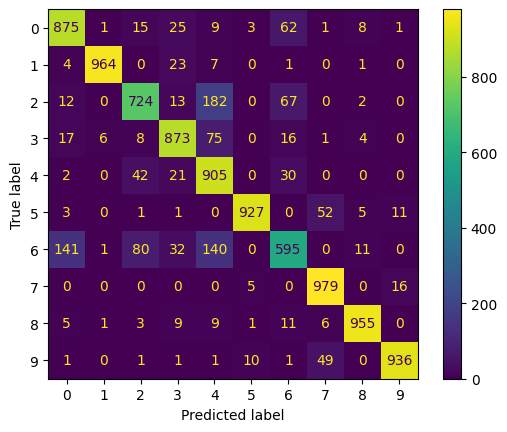

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(truth_labels, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              )
disp.plot()
plt.show()

In [ ]:
list(classes.values())

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']